In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from interpolazione import Interpolazione

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'RC.csv'
fr = pd.read_csv(FILE)

V = np.array(fr['V (V)'])
t = np.array(fr['t (us)']) * 10**-6
C = 0.000000099
R = 996
T = 2* (10**-3)
sigmaV = 0.08

In [5]:
def VR(t, R, C):
    Vg = 4.8
    τ = R * C
    return 2*Vg*np.exp(-t/τ) # /(1+np.exp(-T/(2*τ)))


i = Interpolazione(t,V,VR, 0.1, p0=[R,C])
print(i)

   
Parameters: [1.14343012e+03 8.90798363e-08] 
Sigma parameters: [inf inf]

sigmaY: 0.1

chiquadro ridotto: 0.38
df: 40
pvalue: 100.0%
covariance matrix: [[inf inf]
 [inf inf]]    



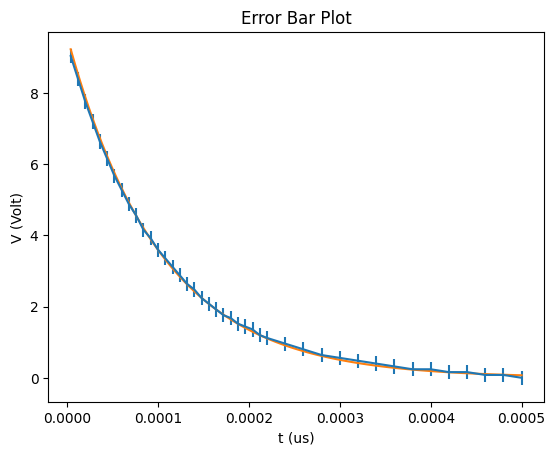

In [6]:
x = np.linspace(min(t), max(t), 1000)
y = VR(x, R, C)

plt.errorbar(t, V, yerr=0.2)
plt.plot(i.x_best,i.y_best)
plt.xlabel('t (us)')
plt.ylabel('V (Volt)')
plt.title('Error Bar Plot')
plt.show()
